# **Importing Libraries and Installing Dependencies**






In [1]:
!pip install -U tensorflow_datasets

     |████████████████████████████████| 2.3MB 4.9MB/s 


In [49]:
from __future__ import absolute_import, division, print_function, unicode_literals


# Import TensorFlow and TensorFlow Datasets
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt


print(tf.__version__)

# This will go away in the future.
# If this gives an error, you might be running TensorFlow 2 or above
# If so, then just comment out this line and run this cell again
tf.enable_eager_execution()
import cv2

1.14.0


In [0]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

# **`Downloading the MNIST Data Set `**

In [4]:
#dowloading dataset from tensorflow and splitting it into training and testing
dataset, metadata = tfds.load('mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/1.0.0. Subsequent calls will reuse this data.


# Data Exploration and Preprocessing





In [5]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [0]:
#every pixel has a value between 0 and 255
#in order for the model to work properly, the value needs to be between 0 and 1
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

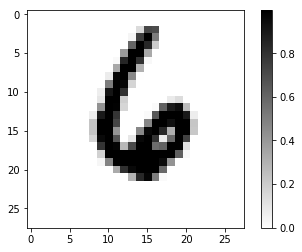

In [7]:
#plot the image in gray scale
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

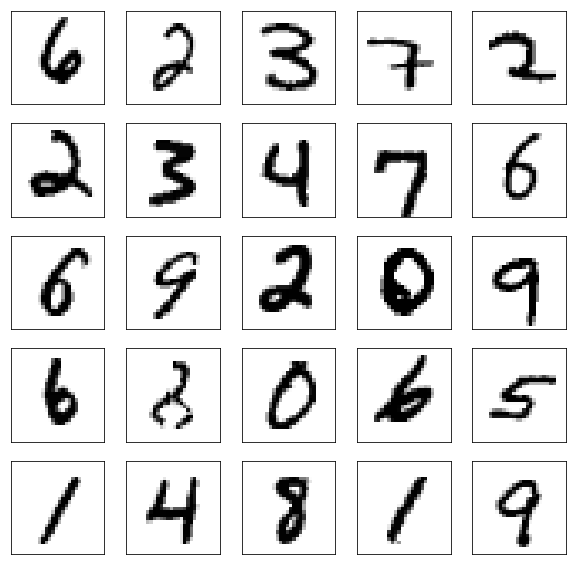

In [8]:
#plotting the first 25 images just to double check that the data looks correct
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    i += 1
plt.show()

# **Building the Initial Model:**


Initial Paramters

1.   3 Layers (Dense)
2.   Relu Activation Function

1.   128 nodes in hidden layer





In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [12]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2554 - acc: 0.9281
Epoch 2/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1087 - acc: 0.9675
Epoch 3/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0761 - acc: 0.9765
Epoch 4/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0572 - acc: 0.9823
Epoch 5/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0453 - acc: 0.9862


**Accuracy: 97.79%**

In [13]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 2s 7ms/step - loss: 0.0722 - acc: 0.9779
Accuracy on test dataset: 0.9779


# Model with Five Layers

In [14]:
#redownloading the dataset to reset dimensions
dataset, metadata = tfds.load('mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

W0903 10:25:21.409130 140367009159040 dataset_builder.py:439] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.


In [0]:
#calling the normalize function defined earlier
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

In [16]:
print(train_dataset)

<DatasetV1Adapter shapes: ((28, 28, 1), ()), types: (tf.float32, tf.int64)>


In [0]:
#five layers, each hidden layer has the same amount of nodes
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [20]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2198 - acc: 0.9336
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0944 - acc: 0.9701
Epoch 3/5
1875/1875 [==============================] - 22s 11ms/step - loss: 0.0760 - acc: 0.9762
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0536 - acc: 0.9826
Epoch 5/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0465 - acc: 0.9851


**Accuracy: 97.73%**

In [21]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 2s 7ms/step - loss: 0.0814 - acc: 0.9773
Accuracy on test dataset: 0.9773


# Sigmoid Activation Function

In [22]:
dataset, metadata = tfds.load('mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

W0903 10:27:20.280719 140367009159040 dataset_builder.py:439] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.


In [0]:
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

In [0]:
#same parameters as the inital model, the only difference is the activation function
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.sigmoid),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [27]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3944 - acc: 0.8981
Epoch 2/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1908 - acc: 0.9454
Epoch 3/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1402 - acc: 0.9593
Epoch 4/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1081 - acc: 0.9691
Epoch 5/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0889 - acc: 0.9747


**Accuracy: 97.16%**

In [28]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 2s 7ms/step - loss: 0.0955 - acc: 0.9716
Accuracy on test dataset: 0.9716


# Hidden Layer with 1,000 Nodes

In [29]:
dataset, metadata = tfds.load('mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

W0903 10:29:12.670256 140367009159040 dataset_builder.py:439] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.


In [0]:
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

In [0]:
#hidden layer has 1,000 nodes
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(1000, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [34]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1785 - acc: 0.9459
Epoch 2/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0702 - acc: 0.9784
Epoch 3/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0494 - acc: 0.9840
Epoch 4/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0348 - acc: 0.9889
Epoch 5/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0298 - acc: 0.9903


**Accuracy: 97.98%**

In [35]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 3s 9ms/step - loss: 0.0719 - acc: 0.9798
Accuracy on test dataset: 0.9798
